In [275]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [276]:
raw_train_data = pd.read_csv("../input/titanic/train.csv")
raw_train_data
raw_test_data = pd.read_csv('../input/titanic/test.csv')

In [277]:
print(raw_test_data.isnull().sum().sum())

414


In [278]:
raw_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [279]:
raw_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [280]:
raw_train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see that Cabin's 77% data is Null. So it is better to remove such column.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

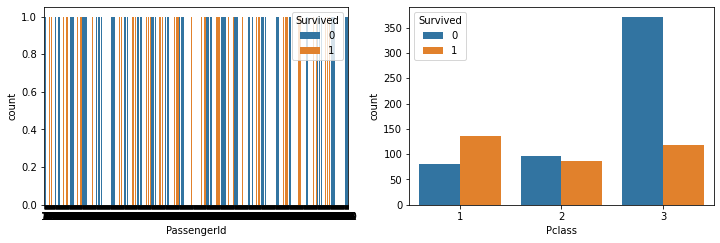

In [281]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x=raw_train_data['PassengerId'], hue=raw_train_data['Survived'])
plt.subplot(222)
sns.countplot(x=raw_train_data['Pclass'], hue=raw_train_data['Survived'])

From the above plot we can se that PassengerId is randomly distributed and we cannot find any links between Passenger Id and Survival. So we can Drop it.

While we can se that passenger of class 1 are more likely to survive than class 3.
So Pclass matters a lot for predicting survival rate.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

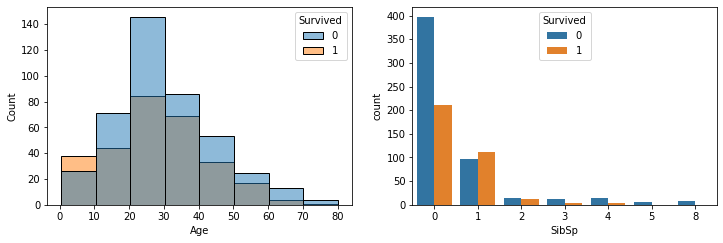

In [282]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.histplot(x=raw_train_data['Age'], hue=raw_train_data['Survived'], bins = 8 )
plt.subplot(222)
sns.countplot(x=raw_train_data['SibSp'], hue=raw_train_data['Survived'])

Here we can see children are most likely to survive than elders.
And people with SibSp = 1 have higher survival rate. 

<AxesSubplot:xlabel='Sex', ylabel='count'>

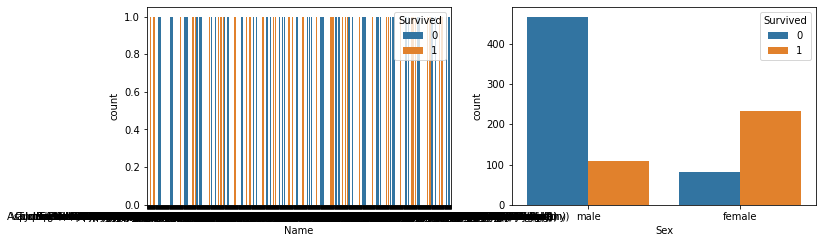

In [283]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x=raw_train_data['Name'], hue=raw_train_data['Survived'])
plt.subplot(222)
sns.countplot(x=raw_train_data['Sex'], hue=raw_train_data['Survived'])

We can see that name is randomly distributed and not showing any patterns.
While in sex, we can see females are more likely to survive than males.

<AxesSubplot:xlabel='Ticket', ylabel='count'>

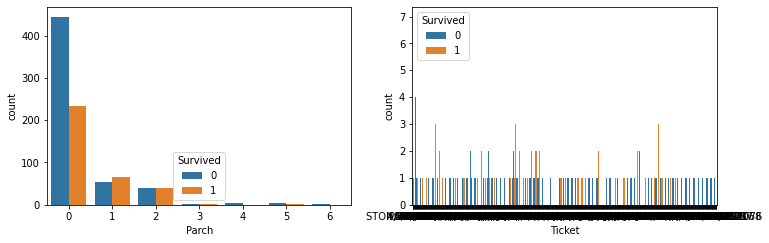

In [284]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x=raw_train_data['Parch'], hue=raw_train_data['Survived'])
plt.subplot(222)
sns.countplot(x=raw_train_data['Ticket'], hue=raw_train_data['Survived'])

People with Parch = 1 have higher survival rate.
But Ticket is Randomly Distributed.

<AxesSubplot:xlabel='Cabin', ylabel='count'>

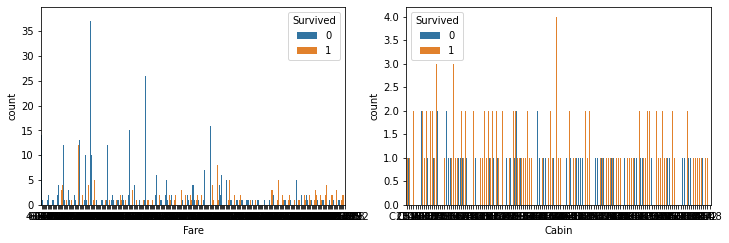

In [285]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x=raw_train_data['Fare'], hue=raw_train_data['Survived'])
plt.subplot(222)
sns.countplot(x=raw_train_data['Cabin'], hue=raw_train_data['Survived'])

We can clearly see people who have paid higher Fare have high survival rate.
While Cabin is Random.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

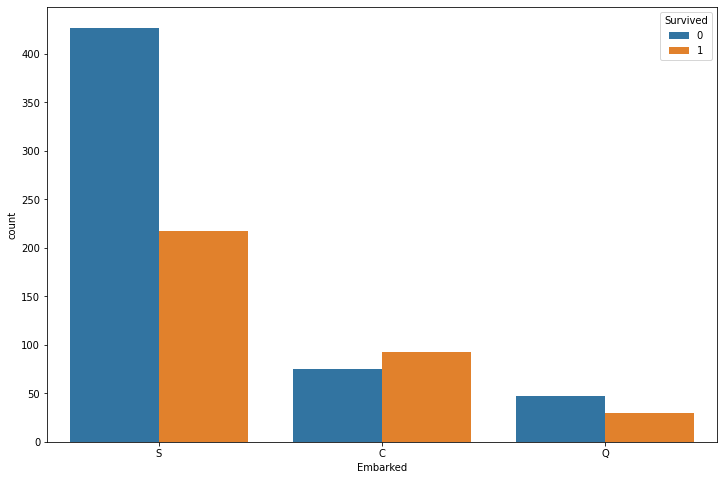

In [286]:
plt.figure(figsize=(12,8))
sns.countplot(x=raw_train_data['Embarked'], hue=raw_train_data['Survived'])

People from Embarked C have higher Survival rate than other two.

In [287]:
train_data_before_processing = raw_train_data.drop('Cabin',axis=1)
train_data_before_processing = train_data_before_processing.drop('Name',axis=1)
train_data_before_processing = train_data_before_processing.drop('Ticket',axis=1)
train_data_before_processing = train_data_before_processing.drop('PassengerId',axis=1)

test_data_before_processing = raw_test_data.drop('Cabin',axis=1)
test_data_before_processing = test_data_before_processing.drop('Name',axis=1)
test_data_before_processing = test_data_before_processing.drop('Ticket',axis=1)
test_data_before_processing = test_data_before_processing.drop('PassengerId',axis=1)

train_data_before_processing 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<AxesSubplot:xlabel='Age', ylabel='count'>

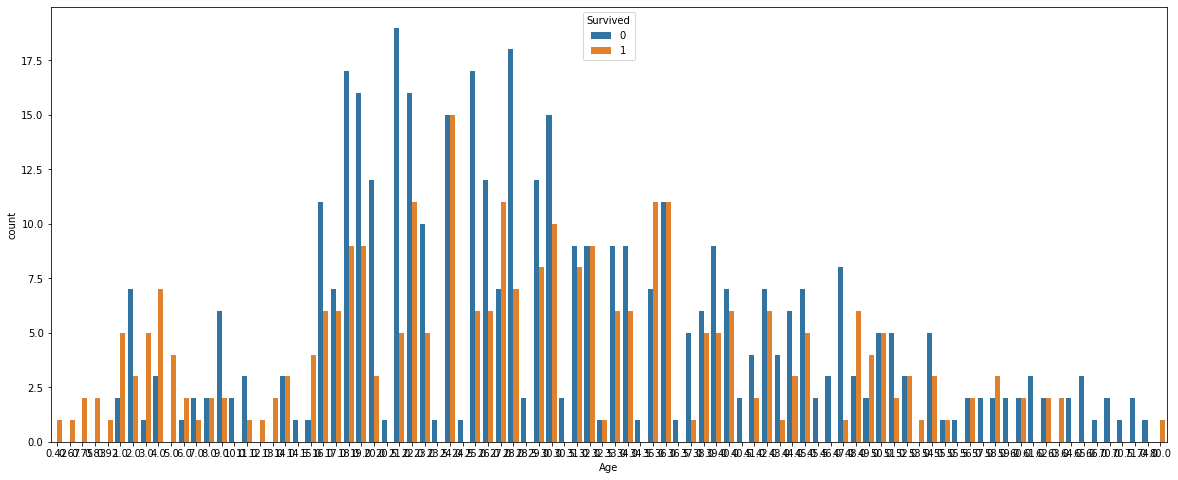

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data = raw_train_data , hue='Survived')

In [289]:
train_data_before_processing['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [290]:
train_data_before_processing1 = train_data_before_processing.sort_values('Survived',ascending=False)
train_data_before_processing1.drop(train_data_before_processing1.tail(207).index,
        inplace = True)
train_data_before_processing1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,1,male,4.0,0,2,81.8583,S
319,1,1,female,40.0,1,1,134.5000,C
334,1,1,female,NaN,1,0,133.6500,S
330,1,3,female,NaN,2,0,23.2500,Q
329,1,1,female,16.0,0,1,57.9792,C
...,...,...,...,...,...,...,...,...
70,0,2,male,32.0,0,0,10.5000,S
72,0,2,male,21.0,0,0,73.5000,S
129,0,3,male,45.0,0,0,6.9750,S
103,0,3,male,33.0,0,0,8.6542,S


In [291]:
train_data_before_processing1 = train_data_before_processing1.sample(frac=1).reset_index(drop=True)
train_data_before_processing1

test_data_before_processing1 = test_data_before_processing

In [292]:
train_data_before_processing1['Sex'] = train_data_before_processing1['Sex'].map({'male':0,'female':1})
train_data_before_processing1

test_data_before_processing1['Sex'] = test_data_before_processing1['Sex'].map({'male':0,'female':1})

In [293]:
train_data_before_processing1['Age'].describe()

count    557.000000
mean      29.309102
std       14.516729
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [294]:
train_data_before_processing1['Age'] = train_data_before_processing1['Age'].fillna(value = train_data_before_processing1['Age'].mean())

test_data_before_processing1['Age'] = test_data_before_processing1['Age'].fillna(value = 29)

In [295]:
print(test_data_before_processing1.isnull().sum().sum())

1


In [296]:
test_data_before_processing1['Fare'].describe()
test_data_before_processing1['Fare']=test_data_before_processing1['Fare'].fillna(value=0.069540)

In [297]:
train_dummy_Embarked = pd.get_dummies(train_data_before_processing1['Embarked'])
train_dummy_Embarked

test_dummy_Embarked = pd.get_dummies(test_data_before_processing1['Embarked'])
test_dummy_Embarked

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [298]:
train_data_before_processing1 = pd.concat([train_data_before_processing1,train_dummy_Embarked], axis=1)
train_data_before_processing1

test_data_before_processing1 = pd.concat([test_data_before_processing1,test_dummy_Embarked], axis=1)
test_data_before_processing1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,3,0,34.5,0,0,7.8292,Q,0,1,0
1,3,1,47.0,1,0,7.0000,S,0,0,1
2,2,0,62.0,0,0,9.6875,Q,0,1,0
3,3,0,27.0,0,0,8.6625,S,0,0,1
4,3,1,22.0,1,1,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,29.0,0,0,8.0500,S,0,0,1
414,1,1,39.0,0,0,108.9000,C,1,0,0
415,3,0,38.5,0,0,7.2500,S,0,0,1
416,3,0,29.0,0,0,8.0500,S,0,0,1


In [299]:
train_data_before_processing1 = train_data_before_processing1.drop('Embarked',axis=1)
train_data_before_processing1

test_data_before_processing1 = test_data_before_processing1.drop('Embarked',axis=1)
test_data_before_processing1

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,29.0,0,0,8.0500,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,0
415,3,0,38.5,0,0,7.2500,0,0,1
416,3,0,29.0,0,0,8.0500,0,0,1


In [300]:
print(train_data_before_processing1.isnull().sum().sum())

0


In [301]:
test_data_before_processing1.shape

(418, 9)

In [302]:
q = train_data_before_processing1['SibSp'].quantile(1.0)
train_data_before_processing2 = train_data_before_processing1[train_data_before_processing1['SibSp']<q]

q2 = train_data_before_processing2['Parch'].quantile(1.0)
train_data_before_processing3 = train_data_before_processing2[train_data_before_processing1['Parch']<q2]

q3 = train_data_before_processing3['Fare'].quantile(1.0)
train_data_before_processing4 = train_data_before_processing3[train_data_before_processing1['Fare']<q3]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [303]:
print(train_data_before_processing4.isnull().sum().sum())

0


In [304]:
from sklearn.preprocessing import MinMaxScaler

In [305]:
scaler = MinMaxScaler()
scaler.fit(train_data_before_processing4[['Age','Fare']])

MinMaxScaler()

In [306]:
train_scaled_data1 = scaler.transform(train_data_before_processing4[['Age','Fare']])

In [307]:
scaler.fit(test_data_before_processing1[['Age','Fare']])
test_scaled_data1 = scaler.transform(test_data_before_processing1[['Age','Fare']])

In [308]:
train_scaled_data2 = pd.DataFrame.from_records(train_scaled_data1, columns =['Age','Fare'])
train_scaled_data2

test_scaled_data2 = pd.DataFrame.from_records(test_scaled_data1, columns =['Age','Fare'])
test_scaled_data2

,Age,Fare
0,0.452723,0.015282
1,0.617566,0.013663
2,0.815377,0.018909
3,0.353818,0.016908
4,0.287881,0.023984
...,...,...
413,0.380193,0.015713
414,0.512066,0.212559
415,0.505473,0.014151
416,0.380193,0.015713


In [309]:
train_scaled_data2.columns

Index(['Age', 'Fare'], dtype='object')

In [310]:
print(train_scaled_data2.isnull().sum().sum())

0


In [311]:
train_scaled_data = train_data_before_processing4.copy()
train_scaled_data[['Age','Fare']] = train_scaled_data1
print(train_scaled_data.isnull().sum().sum())

test_scaled_data = test_data_before_processing1
test_scaled_data.loc[:, ('Age','Fare')] = test_scaled_data2

0


In [312]:
print(train_scaled_data.isnull().sum().sum())

0


In [313]:
train_scaled_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,2,0,0.673285,1,0,0.098859,0,0,1
1,0,1,0,0.233476,3,2,1.000000,0,0,1
2,0,3,1,0.363020,0,2,0.029468,0,1,0
3,1,3,0,0.032420,4,2,0.119344,0,0,1
4,0,1,0,0.359135,0,0,0.114068,0,0,1
...,...,...,...,...,...,...,...,...,...,...
679,1,1,0,0.308872,1,0,0.346309,1,0,0
680,1,1,1,0.220910,1,0,0.865114,1,0,0
681,0,3,0,0.321438,0,0,0.029990,0,0,1
682,1,1,0,0.635587,0,0,0.100951,0,0,1


<AxesSubplot:>

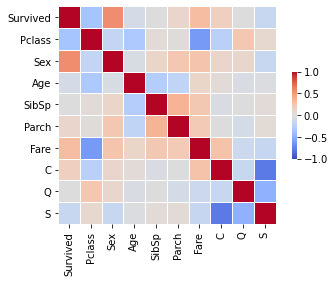

In [314]:
correlation = train_scaled_data.corr()
sns.heatmap(correlation,
                      #mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      )

As we can see Pclass and Fare are correlated so we can remove anyone of them.
We can also see that C , Q and S are also corelated so we can remove them too.

In [315]:
train_scaled_data.corr()['Survived'].sort_values()

Pclass     -0.354868
S          -0.153022
Age        -0.063563
Q           0.003412
SibSp       0.005320
Parch       0.097630
C           0.163854
Fare        0.298571
Sex         0.555624
Survived    1.000000
Name: Survived, dtype: float64

In [316]:
train_scaled_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [317]:
inputs = train_scaled_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']]
targets = train_scaled_data['Survived']
x_test = test_scaled_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']]

In [318]:
test_scaled_data.shape

(418, 9)

In [319]:
from sklearn.model_selection import train_test_split
train_inputs,val_inputs,train_targets,val_targets = train_test_split(inputs,targets,train_size=0.8,random_state=360)

In [320]:
val_inputs.shape

(135, 5)

In [321]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [322]:
model = Sequential()
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [323]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=25)

In [324]:
print(x_test.isnull().sum().sum())

0


In [325]:
print(train_inputs.isnull().sum().sum())

0


In [326]:
model.fit(x=train_inputs,y=train_targets,
          epochs=600,
          validation_data=(val_inputs,val_targets),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/600
17/17 [==============================] - 1s 14ms/step - loss: 1.0409 - val_loss: 0.8396
Epoch 2/600
17/17 [==============================] - 0s 5ms/step - loss: 0.8971 - val_loss: 0.7385
Epoch 3/600
17/17 [==============================] - 0s 5ms/step - loss: 0.8231 - val_loss: 0.6879
Epoch 4/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7662 - val_loss: 0.6664
Epoch 5/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7358 - val_loss: 0.6542
Epoch 6/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7320 - val_loss: 0.6448
Epoch 7/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6752 - val_loss: 0.6362
Epoch 8/600
17/17 [==============================] - 0s 5ms/step - loss: 0.7283 - val_loss: 0.6282
Epoch 9/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6885 - val_loss: 0.6214
Epoch 10/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6708 - val_loss: 0.6134
Epoch 11

<AxesSubplot:>

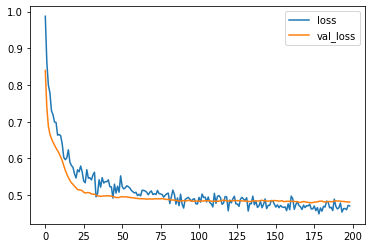

In [327]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [328]:
y_test = pd.read_csv('../input/titanic/gender_submission.csv')
Y_test = y_test.drop('PassengerId',axis=1)
Y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [329]:
x_test.shape

(418, 5)

In [330]:
pred_result = model.predict_classes(x_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [331]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,pred_result))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       266
           1       0.97      0.99      0.98       152

    accuracy                           0.99       418
   macro avg       0.98      0.99      0.98       418
weighted avg       0.99      0.99      0.99       418



In [332]:
print(confusion_matrix(Y_test,pred_result))

[[262   4]
 [  2 150]]


In [333]:
prediction = pd.DataFrame(pred_result,columns=['Survived'])
prediction = pd.concat([y_test['PassengerId'],prediction],axis=1)
prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [334]:
prediction.to_csv('Prediction',index=False)

In [335]:
from sklearn.ensemble import RandomForestClassifier

In [336]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0)

In [337]:
model2.fit(train_inputs,train_targets)

RandomForestClassifier(max_depth=1, random_state=0)

In [338]:
print(x_test.isnull().sum().sum())

0


In [339]:
prediction2 = model2.predict(x_test)
prediction2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [340]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [341]:
prediction2 = pd.DataFrame(prediction2,columns=['Survived'])
prediction2 = pd.concat([y_test['PassengerId'],prediction2],axis=1)
prediction2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [342]:
prediction2.to_csv('Prediction3.0',index=False)